# 19-2 Kaggle Study (bk)

[Web Traffic Time Series Forecasting](https://www.kaggle.com/c/web-traffic-time-series-forecasting)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates

%matplotlib inline

In [12]:
DATA_PATH = "../data/web-traffic-time-series-forecasting/"
KEY_1 = "key_1.csv"
KEY_2 = "key_2.csv"
SAMPLE_SUBMISSION_1 = "sample_submission_1.csv"
SAMPLE_SUBMISSION_2 = "sample_submission_2.csv"
TRAIN_1 = "train_1.csv"
TRAIN_2 = "train_2.csv"

In [13]:
df_key_1 = pd.read_csv(
    DATA_PATH + KEY_1
)

In [14]:
df_key_1.head()

,Page,Id
0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c
3,!vote_en.wikipedia.org_all-access_all-agents_2...,e98873359be6
4,!vote_en.wikipedia.org_all-access_all-agents_2...,fa012434263a


In [15]:
len(df_key_1)

8703780

In [16]:
df_train_1 = pd.read_csv(
    DATA_PATH + TRAIN_1,
    index_col="Page"
).T

In [17]:
df_train_1.index = pd.to_datetime(df_train_1.index)
df_train_1.index.name = 'Date'

df_train_1 = df_train_1.fillna(df_train_1.mean())  # Filling missing data to mean value of columns
df_train_1 = df_train_1.dropna(axis=1)

In [18]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2015-07-01 to 2016-12-31
Columns: 144411 entries, 2NE1_zh.wikipedia.org_all-access_spider to Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider
dtypes: float64(144411)
memory usage: 606.0 MB


In [19]:
df_train_1.head()

Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,La_doña_(telenovela_de_2016)_es.wikipedia.org_all-access_spider,RTS_(canal_de_televisión)_es.wikipedia.org_all-access_spider,La_ley_del_corazón_es.wikipedia.org_all-access_spider,The_Crown_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,18.0,11.0,1.0,35.0,10.277992,12.0,19.691892,118.0,5.0,6.0,...,17.705882,4.054054,34.836364,18.946429,12.203704,14.142857,6.8,40.4375,7.0,9.333333
2015-07-02,11.0,14.0,0.0,13.0,10.277992,7.0,19.691892,26.0,23.0,3.0,...,17.705882,4.054054,34.836364,18.946429,12.203704,14.142857,6.8,40.4375,7.0,9.333333
2015-07-03,5.0,15.0,1.0,10.0,10.277992,4.0,19.691892,30.0,14.0,5.0,...,17.705882,4.054054,34.836364,18.946429,12.203704,14.142857,6.8,40.4375,7.0,9.333333
2015-07-04,13.0,18.0,1.0,94.0,10.277992,5.0,19.691892,24.0,12.0,12.0,...,17.705882,4.054054,34.836364,18.946429,12.203704,14.142857,6.8,40.4375,7.0,9.333333
2015-07-05,14.0,11.0,0.0,4.0,10.277992,20.0,19.691892,29.0,9.0,6.0,...,17.705882,4.054054,34.836364,18.946429,12.203704,14.142857,6.8,40.4375,7.0,9.333333


In [20]:
df_train_1.tail()

Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,La_doña_(telenovela_de_2016)_es.wikipedia.org_all-access_spider,RTS_(canal_de_televisión)_es.wikipedia.org_all-access_spider,La_ley_del_corazón_es.wikipedia.org_all-access_spider,The_Crown_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-27,20.0,30.0,4.0,11.0,11.0,19.0,4.0,23.0,30.0,29.0,...,1.0,2.0,21.0,4.0,8.0,7.0,4.0,40.4375,7.0,12.0
2016-12-28,22.0,52.0,6.0,17.0,27.0,23.0,15.0,32.0,36.0,35.0,...,31.0,18.0,7.0,17.0,21.0,13.0,2.0,40.4375,7.0,13.0
2016-12-29,19.0,45.0,3.0,19.0,13.0,17.0,6.0,39.0,38.0,44.0,...,27.0,40.0,34.0,6.0,14.0,12.0,4.0,40.4375,7.0,3.0
2016-12-30,18.0,26.0,4.0,10.0,36.0,17.0,8.0,32.0,31.0,26.0,...,9.0,1.0,37.0,11.0,24.0,31.0,4.0,40.4375,7.0,5.0
2016-12-31,20.0,20.0,17.0,11.0,10.0,50.0,6.0,17.0,97.0,41.0,...,135.0,42.0,42.0,5.0,37.0,11.0,3.0,51.0000,7.0,10.0


## Visualization

In [21]:
idx = df_train_1.iloc[:, 0].index
data = df_train_1.iloc[:, 0]

In [22]:
data_list = [df_train_1.iloc[:, r] for r in range(10)]

In [23]:
def show_traffic(idx, data_list):
    rows_num = len(data_list)
    row_count = 0
    
    fig, ax_tuple = plt.subplots(
        nrows = rows_num,
        ncols = 1,
        figsize=(15, 3 * rows_num)
    )
    
    for ax in ax_tuple:
        ax.plot_date(
            x=idx,
            y=data_list[row_count],
            fmt='-'
        )
        
        ax.xaxis.set_major_locator(dates.MonthLocator())
        ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m'))

        ax.xaxis.grid(True)
        ax.yaxis.grid(True)
        
        row_count += 1

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


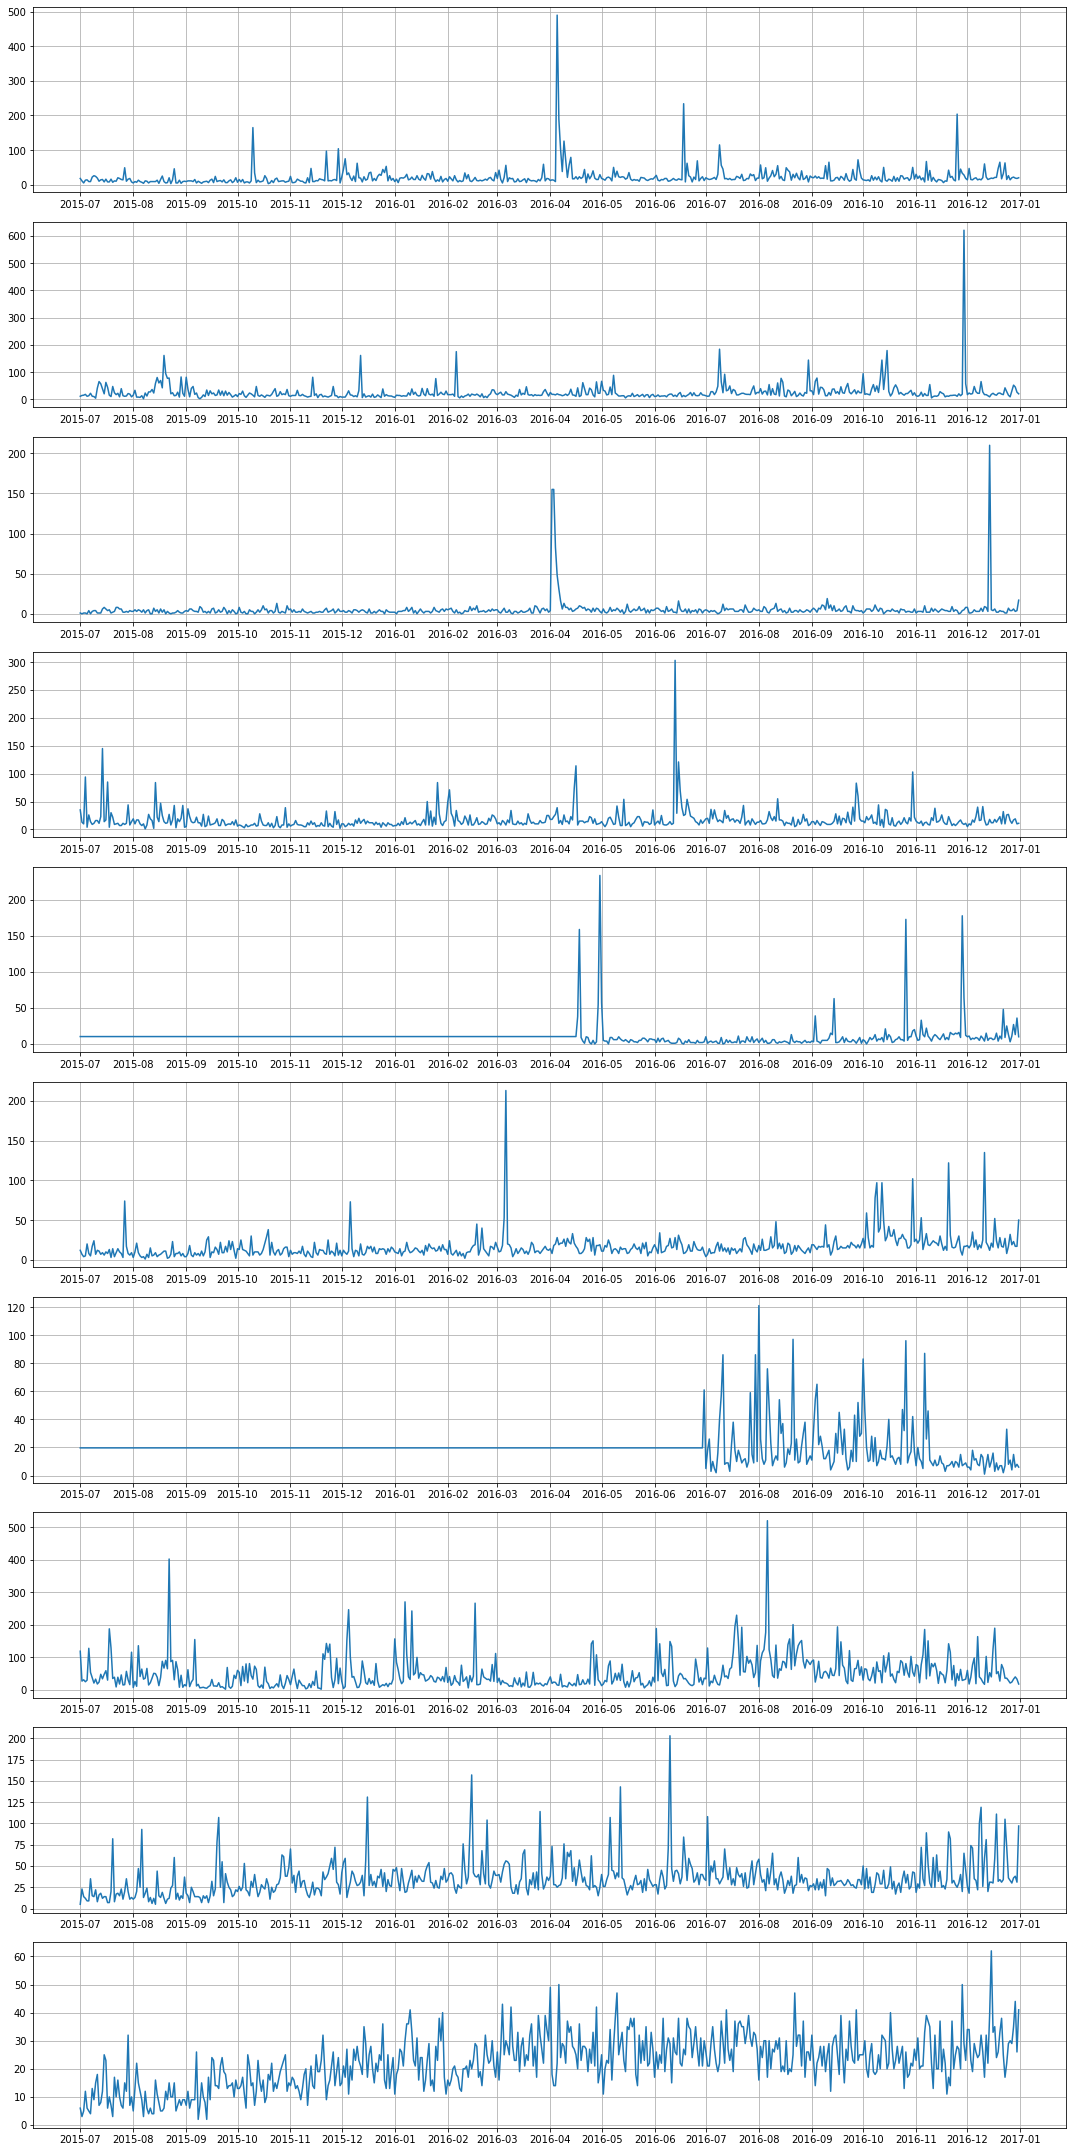

In [24]:
show_traffic(idx, data_list)

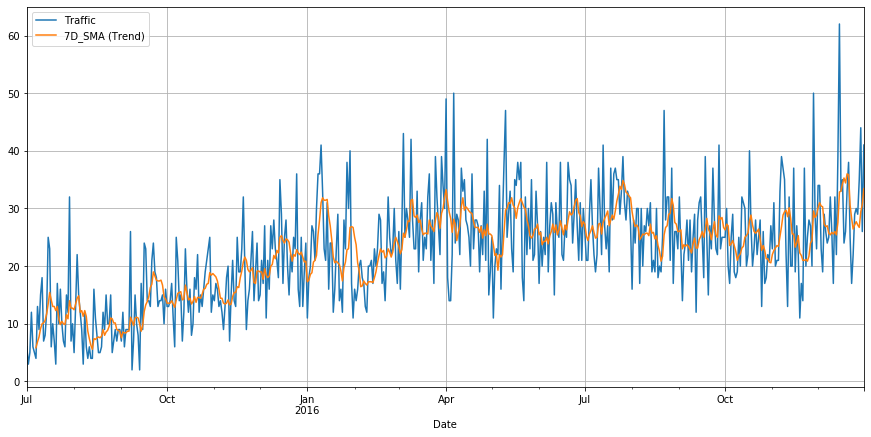

In [25]:
traffic_series = df_train_1.iloc[:, 9]

###

fig = plt.figure(figsize=(15, 7))

traffic_series.plot(label='Traffic')
traffic_series.rolling(window=7).mean().plot(label='7D_SMA (Trend)')

plt.grid(True)
plt.legend()

plt.show()

## Preprocessing Dataset for Single-Variate

### (Test for just one feature)

#### Preprocessing Dataset

In [26]:
NUM_TIME_STEP = 31
FEATURE_INDEX = 9

In [27]:
picked_data = df_train_1.iloc[:, FEATURE_INDEX]
picked_data = picked_data.to_frame()

picked_data

,ASCII_zh.wikipedia.org_all-access_spider
Date,
2015-07-01,6.0
2015-07-02,3.0
2015-07-03,5.0
2015-07-04,12.0
2015-07-05,6.0
...,...
2016-12-27,29.0
2016-12-28,35.0
2016-12-29,44.0


In [28]:
picked_data_column = picked_data.columns

for time_step in range(1, NUM_TIME_STEP + 1):
    picked_data['step_{}'.format(time_step)] = picked_data[picked_data_column].shift(time_step)

In [29]:
picked_data

,ASCII_zh.wikipedia.org_all-access_spider,step_1,step_2,step_3,step_4,step_5,step_6,step_7,step_8,step_9,...,step_22,step_23,step_24,step_25,step_26,step_27,step_28,step_29,step_30,step_31
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,5.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,12.0,5.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-05,6.0,12.0,5.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,29.0,30.0,29.0,22.0,17.0,25.0,38.0,33.0,26.0,24.0,...,29.0,19.0,23.0,34.0,34.0,23.0,29.0,50.0,20.0,27.0
2016-12-28,35.0,29.0,30.0,29.0,22.0,17.0,25.0,38.0,33.0,26.0,...,26.0,29.0,19.0,23.0,34.0,34.0,23.0,29.0,50.0,20.0
2016-12-29,44.0,35.0,29.0,30.0,29.0,22.0,17.0,25.0,38.0,33.0,...,24.0,26.0,29.0,19.0,23.0,34.0,34.0,23.0,29.0,50.0


In [30]:
picked_series_data = picked_data.dropna()

In [31]:
picked_series_data

,ASCII_zh.wikipedia.org_all-access_spider,step_1,step_2,step_3,step_4,step_5,step_6,step_7,step_8,step_9,...,step_22,step_23,step_24,step_25,step_26,step_27,step_28,step_29,step_30,step_31
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-01,5.0,10.0,7.0,32.0,12.0,15.0,6.0,7.0,10.0,16.0,...,15.0,9.0,13.0,4.0,5.0,6.0,12.0,5.0,3.0,6.0
2015-08-02,13.0,5.0,10.0,7.0,32.0,12.0,15.0,6.0,7.0,10.0,...,18.0,15.0,9.0,13.0,4.0,5.0,6.0,12.0,5.0,3.0
2015-08-03,22.0,13.0,5.0,10.0,7.0,32.0,12.0,15.0,6.0,7.0,...,7.0,18.0,15.0,9.0,13.0,4.0,5.0,6.0,12.0,5.0
2015-08-04,15.0,22.0,13.0,5.0,10.0,7.0,32.0,12.0,15.0,6.0,...,8.0,7.0,18.0,15.0,9.0,13.0,4.0,5.0,6.0,12.0
2015-08-05,12.0,15.0,22.0,13.0,5.0,10.0,7.0,32.0,12.0,15.0,...,12.0,8.0,7.0,18.0,15.0,9.0,13.0,4.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,29.0,30.0,29.0,22.0,17.0,25.0,38.0,33.0,26.0,24.0,...,29.0,19.0,23.0,34.0,34.0,23.0,29.0,50.0,20.0,27.0
2016-12-28,35.0,29.0,30.0,29.0,22.0,17.0,25.0,38.0,33.0,26.0,...,26.0,29.0,19.0,23.0,34.0,34.0,23.0,29.0,50.0,20.0
2016-12-29,44.0,35.0,29.0,30.0,29.0,22.0,17.0,25.0,38.0,33.0,...,24.0,26.0,29.0,19.0,23.0,34.0,34.0,23.0,29.0,50.0


In [32]:
NUM_ROW = picked_series_data.shape[0]
train_test_boundary = NUM_ROW - NUM_TIME_STEP

In [33]:
x_train = picked_series_data.iloc[:train_test_boundary, 1:]
y_train = picked_series_data.iloc[:train_test_boundary, 1]

x_test = picked_series_data.iloc[train_test_boundary:, 1:]
y_test = picked_series_data.iloc[train_test_boundary:, 1]

In [34]:
x_train

,step_1,step_2,step_3,step_4,step_5,step_6,step_7,step_8,step_9,step_10,...,step_22,step_23,step_24,step_25,step_26,step_27,step_28,step_29,step_30,step_31
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-01,10.0,7.0,32.0,12.0,15.0,6.0,7.0,10.0,16.0,10.0,...,15.0,9.0,13.0,4.0,5.0,6.0,12.0,5.0,3.0,6.0
2015-08-02,5.0,10.0,7.0,32.0,12.0,15.0,6.0,7.0,10.0,16.0,...,18.0,15.0,9.0,13.0,4.0,5.0,6.0,12.0,5.0,3.0
2015-08-03,13.0,5.0,10.0,7.0,32.0,12.0,15.0,6.0,7.0,10.0,...,7.0,18.0,15.0,9.0,13.0,4.0,5.0,6.0,12.0,5.0
2015-08-04,22.0,13.0,5.0,10.0,7.0,32.0,12.0,15.0,6.0,7.0,...,8.0,7.0,18.0,15.0,9.0,13.0,4.0,5.0,6.0,12.0
2015-08-05,15.0,22.0,13.0,5.0,10.0,7.0,32.0,12.0,15.0,6.0,...,12.0,8.0,7.0,18.0,15.0,9.0,13.0,4.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-26,28.0,25.0,20.0,37.0,14.0,17.0,11.0,22.0,27.0,19.0,...,21.0,20.0,31.0,23.0,27.0,21.0,22.0,18.0,17.0,26.0
2016-11-27,27.0,28.0,25.0,20.0,37.0,14.0,17.0,11.0,22.0,27.0,...,21.0,21.0,20.0,31.0,23.0,27.0,21.0,22.0,18.0,17.0
2016-11-28,20.0,27.0,28.0,25.0,20.0,37.0,14.0,17.0,11.0,22.0,...,33.0,21.0,21.0,20.0,31.0,23.0,27.0,21.0,22.0,18.0


In [35]:
y_train

Date
2015-08-01    10.0
2015-08-02     5.0
2015-08-03    13.0
2015-08-04    22.0
2015-08-05    15.0
              ... 
2016-11-26    28.0
2016-11-27    27.0
2016-11-28    20.0
2016-11-29    50.0
2016-11-30    29.0
Name: step_1, Length: 488, dtype: float64

In [36]:
x_test

,step_1,step_2,step_3,step_4,step_5,step_6,step_7,step_8,step_9,step_10,...,step_22,step_23,step_24,step_25,step_26,step_27,step_28,step_29,step_30,step_31
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-01,23.0,29.0,50.0,20.0,27.0,28.0,25.0,20.0,37.0,14.0,...,35.0,37.0,39.0,33.0,21.0,21.0,20.0,31.0,23.0,27.0
2016-12-02,34.0,23.0,29.0,50.0,20.0,27.0,28.0,25.0,20.0,37.0,...,22.0,35.0,37.0,39.0,33.0,21.0,21.0,20.0,31.0,23.0
2016-12-03,34.0,34.0,23.0,29.0,50.0,20.0,27.0,28.0,25.0,20.0,...,13.0,22.0,35.0,37.0,39.0,33.0,21.0,21.0,20.0,31.0
2016-12-04,23.0,34.0,34.0,23.0,29.0,50.0,20.0,27.0,28.0,25.0,...,32.0,13.0,22.0,35.0,37.0,39.0,33.0,21.0,21.0,20.0
2016-12-05,19.0,23.0,34.0,34.0,23.0,29.0,50.0,20.0,27.0,28.0,...,20.0,32.0,13.0,22.0,35.0,37.0,39.0,33.0,21.0,21.0
2016-12-06,29.0,19.0,23.0,34.0,34.0,23.0,29.0,50.0,20.0,27.0,...,20.0,20.0,32.0,13.0,22.0,35.0,37.0,39.0,33.0,21.0
2016-12-07,26.0,29.0,19.0,23.0,34.0,34.0,23.0,29.0,50.0,20.0,...,37.0,20.0,20.0,32.0,13.0,22.0,35.0,37.0,39.0,33.0
2016-12-08,24.0,26.0,29.0,19.0,23.0,34.0,34.0,23.0,29.0,50.0,...,19.0,37.0,20.0,20.0,32.0,13.0,22.0,35.0,37.0,39.0
2016-12-09,25.0,24.0,26.0,29.0,19.0,23.0,34.0,34.0,23.0,29.0,...,27.0,19.0,37.0,20.0,20.0,32.0,13.0,22.0,35.0,37.0


In [37]:
y_test

Date
2016-12-01    23.0
2016-12-02    34.0
2016-12-03    34.0
2016-12-04    23.0
2016-12-05    19.0
2016-12-06    29.0
2016-12-07    26.0
2016-12-08    24.0
2016-12-09    25.0
2016-12-10    32.0
2016-12-11    26.0
2016-12-12    17.0
2016-12-13    32.0
2016-12-14    22.0
2016-12-15    39.0
2016-12-16    62.0
2016-12-17    33.0
2016-12-18    35.0
2016-12-19    24.0
2016-12-20    26.0
2016-12-21    33.0
2016-12-22    38.0
2016-12-23    25.0
2016-12-24    17.0
2016-12-25    22.0
2016-12-26    29.0
2016-12-27    30.0
2016-12-28    29.0
2016-12-29    35.0
2016-12-30    44.0
2016-12-31    26.0
Name: step_1, dtype: float64

In [38]:
x_train = x_train.values
y_train = y_train.values

x_test = x_test.values
y_test = y_test.values

In [39]:
x_train = x_train.reshape(x_train.shape[0], NUM_TIME_STEP, 1)

x_test = x_test.reshape(x_test.shape[0], NUM_TIME_STEP, 1)

In [40]:
x_train.shape

(488, 31, 1)

### Modeling

In [41]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

In [42]:
CLIPVALUE = 0.1

In [43]:
model = tf.keras.models.Sequential()

In [44]:
model.add(tf.keras.layers.LSTM(
    128,
    return_sequences=True,
    input_shape=(NUM_TIME_STEP, 1)
))
model.add(tf.keras.layers.LSTM(
    64,
    activation='relu'
))
model.add(tf.keras.layers.Dense(1))

In [45]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(clipvalue=CLIPVALUE),
    loss='mae'
)

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 31, 128)           66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


### Training

In [47]:
model.fit(
    x_train,
    y_train,
    epochs=100
)

Train on 488 samples
Epoch 1/100
488/488 [==============================] - 6s 12ms/sample - loss: 12.1421
Epoch 2/100
488/488 [==============================] - 1s 2ms/sample - loss: 5.9520
Epoch 3/100
488/488 [==============================] - 1s 2ms/sample - loss: 6.7476
Epoch 4/100
488/488 [==============================] - 1s 2ms/sample - loss: 6.2396
Epoch 5/100
488/488 [==============================] - 1s 2ms/sample - loss: 6.4578
Epoch 6/100
488/488 [==============================] - 1s 2ms/sample - loss: 5.9154
Epoch 7/100
488/488 [==============================] - 1s 2ms/sample - loss: 6.1432
Epoch 8/100
488/488 [==============================] - 1s 2ms/sample - loss: 5.9117
Epoch 9/100
488/488 [==============================] - 1s 2ms/sample - loss: 5.8572
Epoch 10/100
488/488 [==============================] - 1s 2ms/sample - loss: 5.7387
Epoch 11/100
488/488 [==============================] - 1s 2ms/sample - loss: 5.5761
Epoch 12/100
488/488 [=============================

488/488 [==============================] - 1s 2ms/sample - loss: 1.6120
Epoch 97/100
488/488 [==============================] - 1s 2ms/sample - loss: 1.4315
Epoch 98/100
488/488 [==============================] - 1s 2ms/sample - loss: 1.3328
Epoch 99/100
488/488 [==============================] - 1s 2ms/sample - loss: 1.4207
Epoch 100/100
488/488 [==============================] - 1s 2ms/sample - loss: 1.4579


### Testing

In [48]:
y_pred = model.predict(x_test)

In [49]:
y_pred

array([[21.737091],
       [31.963356],
       [31.85453 ],
       [21.618107],
       [17.902252],
       [26.746748],
       [24.08107 ],
       [22.444633],
       [23.33913 ],
       [29.666441],
       [24.062794],
       [15.791347],
       [30.068893],
       [20.76125 ],
       [36.806557],
       [46.70912 ],
       [32.342304],
       [33.30687 ],
       [22.416122],
       [24.059778],
       [30.913626],
       [35.87201 ],
       [23.587574],
       [15.961961],
       [21.2739  ],
       [26.97998 ],
       [27.819052],
       [26.827566],
       [32.88049 ],
       [40.701046],
       [24.692139]], dtype=float32)

In [50]:
len(y_pred)

31

### Plotting the Result

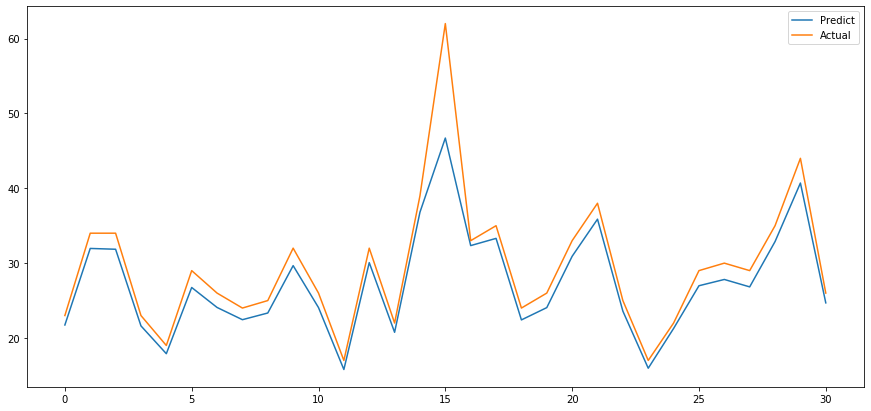

In [51]:
fig = plt.figure(figsize=(15, 7))

plt.plot(y_pred, label='Predict')
plt.plot(y_test, label='Actual')

plt.legend()
plt.show()

---

## Preprocessing Dataset for Multi-Variate

In [16]:
df_train_1.head()

Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,La_doña_(telenovela_de_2016)_es.wikipedia.org_all-access_spider,RTS_(canal_de_televisión)_es.wikipedia.org_all-access_spider,La_ley_del_corazón_es.wikipedia.org_all-access_spider,The_Crown_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,18.0,11.0,1.0,35.0,10.277992,12.0,19.691892,118.0,5.0,6.0,...,17.705882,4.054054,34.836364,18.946429,12.203704,14.142857,6.8,40.4375,7.0,9.333333
2015-07-02,11.0,14.0,0.0,13.0,10.277992,7.0,19.691892,26.0,23.0,3.0,...,17.705882,4.054054,34.836364,18.946429,12.203704,14.142857,6.8,40.4375,7.0,9.333333
2015-07-03,5.0,15.0,1.0,10.0,10.277992,4.0,19.691892,30.0,14.0,5.0,...,17.705882,4.054054,34.836364,18.946429,12.203704,14.142857,6.8,40.4375,7.0,9.333333
2015-07-04,13.0,18.0,1.0,94.0,10.277992,5.0,19.691892,24.0,12.0,12.0,...,17.705882,4.054054,34.836364,18.946429,12.203704,14.142857,6.8,40.4375,7.0,9.333333
2015-07-05,14.0,11.0,0.0,4.0,10.277992,20.0,19.691892,29.0,9.0,6.0,...,17.705882,4.054054,34.836364,18.946429,12.203704,14.142857,6.8,40.4375,7.0,9.333333


In [36]:
df_temp = df_train_1.head()
df_temp = df_temp.iloc[:, :10]

In [37]:
df_temp

Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider
Date,,,,,,,,,,
2015-07-01,18.0,11.0,1.0,35.0,10.277992,12.0,19.691892,118.0,5.0,6.0
2015-07-02,11.0,14.0,0.0,13.0,10.277992,7.0,19.691892,26.0,23.0,3.0
2015-07-03,5.0,15.0,1.0,10.0,10.277992,4.0,19.691892,30.0,14.0,5.0
2015-07-04,13.0,18.0,1.0,94.0,10.277992,5.0,19.691892,24.0,12.0,12.0
2015-07-05,14.0,11.0,0.0,4.0,10.277992,20.0,19.691892,29.0,9.0,6.0


In [38]:
column_indexes = df_temp.columns

In [39]:
num_time_step = 3

In [47]:
df_temp[column_indexes[0]]["step_1"] = df_temp[column_indexes[0]].shift(1)

Date
2015-07-01 00:00:00                                                  NaN
2015-07-02 00:00:00                                                   18
2015-07-03 00:00:00                                                   11
2015-07-04 00:00:00                                                    5
2015-07-05 00:00:00                                                   13
_1                                                                    14
_2                     Date
2015-07-01     NaN
2015-07-02    18.0
201...
_3                     Date
2015-07-01 00:00:00    NaN
2015-07-02 00:...
step_1                 Date
2015-07-01 00:00:00    NaN
2015-07-02 00:...
Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: object

In [46]:
df_temp

Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider
Date,,,,,,,,,,
2015-07-01,18.0,11.0,1.0,35.0,10.277992,12.0,19.691892,118.0,5.0,6.0
2015-07-02,11.0,14.0,0.0,13.0,10.277992,7.0,19.691892,26.0,23.0,3.0
2015-07-03,5.0,15.0,1.0,10.0,10.277992,4.0,19.691892,30.0,14.0,5.0
2015-07-04,13.0,18.0,1.0,94.0,10.277992,5.0,19.691892,24.0,12.0,12.0
2015-07-05,14.0,11.0,0.0,4.0,10.277992,20.0,19.691892,29.0,9.0,6.0


In [40]:
for index in column_indexes:
    for time_step in range(num_time_step):
        current_step = time_step + 1
        
        df_temp[index]["_{}".format(current_step)] = df_temp[index].shift(current_step)

In [41]:
df_temp

Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider
Date,,,,,,,,,,
2015-07-01,18.0,11.0,1.0,35.0,10.277992,12.0,19.691892,118.0,5.0,6.0
2015-07-02,11.0,14.0,0.0,13.0,10.277992,7.0,19.691892,26.0,23.0,3.0
2015-07-03,5.0,15.0,1.0,10.0,10.277992,4.0,19.691892,30.0,14.0,5.0
2015-07-04,13.0,18.0,1.0,94.0,10.277992,5.0,19.691892,24.0,12.0,12.0
2015-07-05,14.0,11.0,0.0,4.0,10.277992,20.0,19.691892,29.0,9.0,6.0


In [26]:
for index in column_indexes:
    for time_step in range(num_time_step):
        current_step = time_step + 1
        
        df_temp[index]["_{}".format(current_step)] = 

pandas.core.indexes.base.Index

In [24]:
df_train_1.iloc[:, 0]

Date
2015-07-01    18.0
2015-07-02    11.0
2015-07-03     5.0
2015-07-04    13.0
2015-07-05    14.0
              ... 
2016-12-27    20.0
2016-12-28    22.0
2016-12-29    19.0
2016-12-30    18.0
2016-12-31    20.0
Name: 2NE1_zh.wikipedia.org_all-access_spider, Length: 550, dtype: float64

## Model

In [18]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

In [204]:
df_train_1 = df_train_1.T

In [278]:
df_train_1.head()

Date,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
Page,,,,,,,,,,,,,,,,,,,,,
2NE1_zh.wikipedia.org_all-access_spider,18.000000,11.000000,5.000000,13.000000,14.000000,9.000000,9.000000,22.000000,26.000000,24.000000,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
2PM_zh.wikipedia.org_all-access_spider,11.000000,14.000000,15.000000,18.000000,11.000000,13.000000,22.000000,11.000000,10.000000,4.000000,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
3C_zh.wikipedia.org_all-access_spider,1.000000,0.000000,1.000000,1.000000,0.000000,4.000000,0.000000,3.000000,4.000000,4.000000,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
4minute_zh.wikipedia.org_all-access_spider,35.000000,13.000000,10.000000,94.000000,4.000000,26.000000,14.000000,9.000000,11.000000,16.000000,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,10.277992,10.277992,10.277992,10.277992,10.277992,10.277992,10.277992,10.277992,10.277992,10.277992,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [229]:
df_train_1_data = df_train_1.values

In [230]:
size, time_step = df_train_1_data.shape

In [231]:
df_train_1_data = df_train_1_data.reshape(size, time_step, 1)

In [301]:
df_train_1_data.shape

(144411, 550, 1)

In [302]:
TIME_STEP = 550
NUM_FEATURES = df_train_1_data.shape[2]
FORECAST_TIME_STEP = 30
CLIPVALUE=1.0

EVALUATION_INTERVAL = 144411
EPOCHS = 20

In [303]:
model = tf.keras.models.Sequential()

In [304]:
model.add(tf.keras.layers.LSTM(
    16,
#     return_sequences=True,
    input_shape=(None, 1)
))
# model.add(tf.keras.layers.LSTM(
#     8,
#     activation='relu'
# ))
# model.add(tf.keras.layers.Dense(FORECAST_TIME_STEP))

In [305]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(clipvalue=CLIPVALUE),
    loss='mae'
)

In [306]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 16)                1152      
Total params: 1,152
Trainable params: 1,152
Non-trainable params: 0
_________________________________________________________________


In [307]:
model.fit(
    df_train_1_data,
    epochs=EPOCHS
#     steps_per_epoch=EVALUATION_INTERVAL
)

Train on 144411 samples
Epoch 1/20
    32/144411 [..............................] - ETA: 14:05

IndexError: list index out of range

In [ ]:
# class WT_Model(Model):
#     def __init__(self):
#         super(WT_Model, self).__init__()
#         self.lstm_1 = LSTM(
#             16,
#             input_shape=()  # (time_step, features)
#         )